One of the easiest ways to find out is how many times the predictions made by the ML model were correct. For example, if the ML model is right only 50% of the time, then it is not at all useful. As you can be right 50% of the time by making random decisions too. 

For instance,  the task is to predict the heads or tails in a coin toss. The model can predict heads every time and be right 50% of the time. Since there are only two choices, heads or tails, even a random guess will be right 50% of the time. Therefore, you need the model to be right more than 50% of the time.

On the other hand, if the ML model was right 8 out of 10 times, then it is right 80% of the times. And we can say that it is indeed able to find some patterns to map the input to output and not random. In technical jargons, this score of 80% is called accuracy.

What should be the desired threshold of the accuracy while using ML models for trading?

An accuracy score above 50% is satisfactory for an ML model. Aren't you interested in finding the accuracy of the machine learning model we had created in the previous chapter?

Let's find out now!

To do that, we will use the predicted output (`y_pred`) and the expected output (`y_test`). 

We will import the libraries and read the model predicted values (`y_pred`) and the expected target values (`y_test`) from the `test_data`.

In [1]:
# For data manipulation
import pandas as pd

# Libraries for evaluating the model
from sklearn.metrics import classification_report, \
confusion_matrix

# Libraries for plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
import seaborn as sns
import matplotlib.colors as clrs

# Define the path for the data files
path = "../data_modules/"

# Read the model predicted target values
y_pred = pd.read_csv(path + "JPM_predicted_2017_2019.csv",
                     index_col=0, parse_dates=True)['signal']

# Read the target values of the testing dataset
y_test = pd.read_csv(path + "JPM_target_testing_2017_2019.csv",
                     index_col=0, parse_dates=True)['signal']

Accuracy is nothing but the total correct predictions divided by the total predictions. We plot the data to see how the correct and incorrect predictions are distributed. The green points are where the predictions were correct and the red points are where the predictions were incorrect.

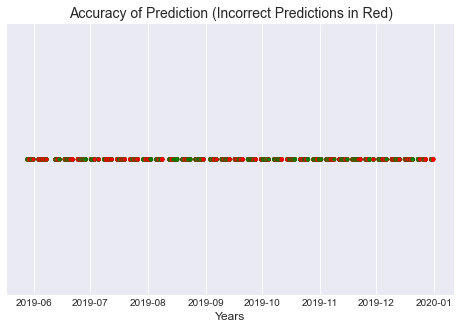

The accuracy is 51.55%.


In [2]:
# Define the accuracy data
accuracy_data = (y_pred == y_test)

# Accuracy percentage
accuracy_percentage = round(100 * 
                            accuracy_data.sum()/len(accuracy_data),
                            2)

# Plot the accuracy data
plt.figure(figsize=(8, 5))

# Colour mapping for the correct and incorrect predictions
cmap = clrs.ListedColormap(['green', 'red'])

plt.yticks([])
plt.scatter(x=y_test.index, y=[1]*len(y_test),
            c=(accuracy_data != True).astype(float),
            marker='.', cmap=cmap)

# Set the title and axis label
plt.title("Accuracy of Prediction (Incorrect Predictions in Red)",
          fontsize=14)
plt.xlabel('Years', fontsize=12)

# Display the results
plt.show()
print(f"The accuracy is {accuracy_percentage}%.")

The accuracy is calculated as seen above. These calculations for the accuracy and other performance metrics can be done using the ready-made `classification_report` method. You will learn about the `classification_report` method in the latter part of the chapter.

Is the accuracy score enough to conclude that the ML model is effective?

Probably not.
Consider an ML model designed to predict whether you should buy or sell. This ML model has an accuracy of 73%. But while using this model, the sell signals are not great and making losses.

How is that possible for an ML model with 73% accuracy?

To get an answer to that question, you have to get the accuracy number label wise, or the action which the ML model will take. In this case, the accuracy for each buy and sell prediction. This will help you get a more granular view of how the model is performing.

It comes out that the ML model predicted 100 times that the price would go up, the price actually went up 90 times. And 10 times it actually fell. 

So for predicting the “Buy” signal, the model is 90% accurate. That’s pretty good.

| | | ML Predicted Buy |
|---|---|---|
| Actual price movement | Price does not go up | 10 |
| | Price goes up | 90 |



But for the sell signal. The model predicted 50 times that price would go down. The price went down only 20 times and 30 times it went up. The model is only 40% accurate in predicting the sell signal. Therefore, placing a sell order based on the model's recommendation is bound to be disastrous.


| | | ML Predicted Buy | ML Predicted to Sell |
|---|---|---|---|
| Actual price movement | Price does not go up | 10 | 20 |
| | Price goes up | 90 | 30 |  


<br>The matrix shown here is called a confusion matrix.

Sometimes, there are jargons used to explain the matrix labels such as False Positive, True Positive, False Negative, and True Negative. In the above example, let’s say Buy is Positive and Sell is Negative.

On all the occasions where the ML model predicted buy correctly, we call that as True Positive. The number of times where the ML model was wrong in predicting Buy or positive, we call it as False Positive. False because the ML model was wrong in forecasting the positive label.

Similarly, can you tell what is a True Negative and False Negative?

The number of times ML model correctly predicted negative or the sell signal, is True Negative. And where the ML model was incorrect in the prediction of negative label or sell signal, is called a False Negative. This usage of terminology of positive and negative comes from medical science, where we run the test and the result is either positive or negative. But in some cases, there can be a misdiagnosis.

Let us see the confusion matrix of our machine learning model now.



Syntax:
```python
confusion_matrix(y_test, y_pred)
```

Parameters:

1. **y_test:** The observed target from the training dataset.
2. **y_pred:** The predicted target from the model.

Returns:

A `numpy` array of the confusion matrix.

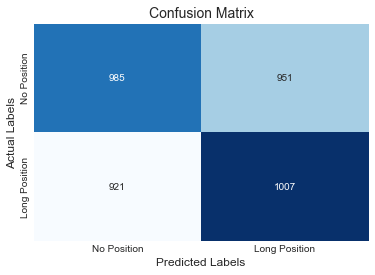

In [3]:
# Define the confusion matrix
confusion_matrix_data = confusion_matrix(y_test.values, 
                                         y_pred.values)

# Plot the data
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(confusion_matrix_data, fmt="d",
            cmap='Blues', cbar=False, annot=True, ax=ax)

# Set the axes labels and the title
ax.set_xlabel('Predicted Labels', fontsize=12)
ax.set_ylabel('Actual Labels', fontsize=12)
ax.set_title('Confusion Matrix', fontsize=14)
ax.xaxis.set_ticklabels(['No Position', 'Long Position'])
ax.yaxis.set_ticklabels(['No Position', 'Long Position'])

# Display the plot
plt.show()

The confusion matrix as seen above gives us the following information:

1. True Positive: 1007 correct predictions for taking a long position.
2. False Positive: 951 incorrect predictions for taking a long position when the expected action was no position.
3. True Negative: 985 correct predictions for taking no position.
4. False Negative: 921 incorrect predictions for taking no position when the expected action was to take a long position.

The confusion matrix helps us understand the effectiveness of the model, but it has its own limitation.

If you have more labels to classify, the confusion matrix grows. 
For example, 3 labels like buy, no position, and sell look like this.

<br>

|||ML Predicted Buy|No position|Sell|
|--|---|---|--|--|
|Actual price|Price goes up|10|25|40|
|movement|Price stays the same|90|25|20|
||Price goes down|80|40|30|
<br>


And if your labels are the quantity of shares, which can range from 0 to 10, to buy, then it will be an 11 by 11 table.

Thus, as the number of labels grows, it becomes difficult to interpret.

||||ML|Predict|||||||||
|---|---|---|---|---|---|---|---|---|---|---|---|---|
|||Buy 0|..|..|..|..|..|..|..|..|..|Buy 10 |
|Actual Price |No increase| 10|25|40|10|25|40|10|25|40|10|25|
|Movement|Increases 0.1%| 25|40|10|25|40|10|25|40|10|25|10|
||Increases 0.2%| 40|10|25|40|10|25|40|10|25|10|23|
||Increases 0.3%| 25|40|10|25|40|10|25|10|45|5|15|
||Increases 0.4%| 10|25|40|10|25|40|10|25|10|40|50
||Increases 0.5%| 25|40|10|25|40|10|25|10|45|5|15|
||Increases 0.6%| 40|10|25|40|10|25|40|10|25|10|23|
||Increases 0.7%| 10|25|40|10|25|40|10|25|10|40|50
||Increases 0.8%| 40|10|25|40|10|25|40|10|25|10|23|
||Increases 0.9%| 25|40|10|25|40|10|25|10|45|5|15|
||Increases 1%+| 10|25|40|10|25|40|10|25|10|40|50|


<br>

Are there other reasons we should not keep accuracy as the only metric?

Let's take a slight diversion here and imagine that Rob wants to create an ML algorithm that would be helpful in times of stress or market fall, such as during the outbreak of the covid 19 pandemic.

He analysed the daily returns of the S&P 500 for the past 40 years.

Rob built an ML algorithm to predict when the S&P 500’s daily returns will be less than -5%. And based on the ML model prediction, Rob will short the SP500 futures. This ML model created by Rob showed accuracy of 99.8%. Whoa! He was on cloud 9! 

But Mary, his friend and colleague, looked suspicious and took a deep dive into the data. The ML algorithm was run on 10,000 days from 1980 to 2021. The ML was correct 9980 times, resulting in accuracy of 99.8%. 

She found that the S&P 500 went below 5% only 20 times. 

And the algorithm predicted on all days including the 20 days to not short S&P 500 futures. On all 20 days where SP500 fell by 5%, the model was incorrect.

Mary explained the problem to Rob and advised him that there is a better metric to use here. It is to check how many times the model predicted that the market will fall by 5% correctly.

|||ML prediction||
|--|--|--|--|
|||Price not below 5%|Price below 5%|
|Actual value|Price not below 5%|9980|0|
||Price goes below 5%|20|0|

In the example, it is zero out of 20 instances. 

This is called recall metrics.

So Rob was delighted and said he will only use recall going forward.

Mary had to tell Rob that the recall metric as standalone is also not good.

What if the model simply predicts to sell on all days?

|||ML prediction||
|--|--|--|--|
|||Price not below 5%|Price below 5%|
|Actual value|Price not below 5%|0|9980|
||Price goes below 5%|0|20|
 



The recall for the market falling by 5%  will be 20/20 or 100%, that is correct all the time. But you know this model is not useful.

Mary said you should also check the number of times the model gave the sell signal and it turned outright.



|||ML prediction||
|--|--|--|--|
|||Price not below 5%|Price below 5%|
|Actual value|Price not below 5%|0|9980|
||Price goes below 5%|0|20|
||Total||100|

<br>

Rob realised that this value is 20 out of 10000 times, which is 0.002. This value is called precision. 

Rob realised that both recall and precision are equally important. 

He asked Mary if there's a way to create a performance measure that can combine both?

Mary said Yes. It is called the f1 score. You can use the f1 score to understand the overall performance of the algorithm. The f1 score is the harmonic mean of precision and recall. 

$$ f1 score = 2 * \frac{(precision * recall)}{(precision + recall)} $$

Rob quickly calculated the  f1 score for his model. It came out to 0.003.

$$ f1 score = 2 * \frac{(1*0.002)}{(1+0.002)} = \frac{0.004}{1.002}  = 0.003$$

Let us look at the formulae for the different performance metrics:

$$
\text{Recall} = \frac{\text{Number of times the algorithm predicted an outcome correctly}}{\text{Total number of the actual outcomes}}\\[1cm] $$
$$ \text{Precision} = \frac{\text{Number of times the algorithm predicted an outcome correctly}}{\text{Total number of said outcomes predicted by the algorithm}}\\[1cm] $$
$$ \text{f1-score} = \frac{2 * \text{(precision * recall)}}{\text{(precision + recall)}}\\[1cm]
$$

The `scikit-learn` library has a function called `classification_report` which provides measures like precision, recall, f1-score and support for each class. Precision and recall indicate the quality of our predictions. The f1-score gives the harmonic mean of precision and recall. The support values are used as weights to compute the average values of precision, recall and f1-score.

An f1-score above 0.5 is usually considered a good number.

You can simply use the following syntax to print the classification report.

Syntax:
```python
classification_report(y_test, y_pred)
```

Parameters:

1. **y_test:** The observed target from the training dataset.<br>
2. **y_pred:** The predicted target from the model.<br>

Returns: <br>

Classification Report containing precision, recall, f1-score and support.

In [4]:
# Classification report
classification_report_data = classification_report(y_test,
                                                   y_pred)

# Print the classification report
print(classification_report_data)

              precision    recall  f1-score   support

           0       0.52      0.51      0.51      1936
           1       0.51      0.52      0.52      1928

    accuracy                           0.52      3864
   macro avg       0.52      0.52      0.52      3864
weighted avg       0.52      0.52      0.52      3864



In the left-most column, you can see the values 0.0 and 1.0. These represent the position as follows:

1. `0` means no position.
1. `1` means a long position.

So from the table, you can say that the ML Model has an overall accuracy score of 0.52. The accuracy we calculated was 51.55% which is approximately 0.52. Apart from accuracy, you can identify the precision, recall, and f1-score for the signals as well. 

Support is the number of actual occurrences of the class in the specified dataset. Thus, in the total signal, there were 1936 occurrences of `0`, and 1928 occurrences of the `1` signal.

The accuracy score tells you how the ML model performed in total. 


What are macro and weighted averages?

Sometimes, the signal values might not be balanced. There could be instances where the number of occurrences for `0` is barely 50 while the number of occurrences for `1.0` is 500. In this scenario, the weighted average will give more weightage to the signal `1`. In contrast, the macro average takes a simple average of all the occurrences.


Thus, the machine learning model's performance can be analysed using the metrics you have learned in this notebook. Great! Now you know the metrics to analyse the performance, but what happens if we use this algorithm in the real world?